# World bank data cleaner
世界银行数据清洗工具. 

世界银行有个开放的数据库http://data.worldbank.org 这个数据库很强大, 里面有各国各种经济数据. 我看了GDP, GDP年增长率, 税收, 税收占GDP百分比几个数据集, 发现里面的格式基本相同. 因此就可以统一清理数据了. 

所以做了一个这样的简单清洗器. 两个函数: 

* worldbank_data_reader(filename)用于读取原始数据, 因为读取一次文件的成本较高, 而处理的方式可以很多样, 所以建议先读取数据以后保存在一个dataframe中. 
* worldbank_data_cleaner(origin_df, countries="global", years=(1996,2006)): 对origin_df这个dataframe进行清洗, 提取出感兴趣的国家和感兴趣的年份, 返回出的Dataframe以年份作为index, 以国家名作为columns
  * countries 默认为"global", 返回所有国家信息, 也可以使用列表指定感兴趣的国家名, 例如countries=["China","United States"], 注意使用正确的国家名称
  * years=(1996, 2006), 按照python的习惯, 返回自1996年至2006年前的数据, 也就是1996, 1997..2004, 2005年的数据. 
<!-- TEASER_END -->  

In [1]:
import pandas as pd
import numpy as np
% matplotlib inline

def worldbank_data_reader(filename):
    return pd.read_csv(filename,header=2)
    
def worldbank_data_cleaner(origin_df, countries="global", years=(1960,2017)):
    df=origin_df.set_index("Country Name").iloc[:,3:-1]
    year_range=pd.to_datetime(np.arange(years[0],years[1]),format="%Y")
    df.columns=(pd.to_datetime(df.columns,format="%Y"))
    if countries != "global" :
        df=df.loc[countries,year_range].T
    else:
        df=df.loc[:,year_range].T
    df.index.name="year"
    return df

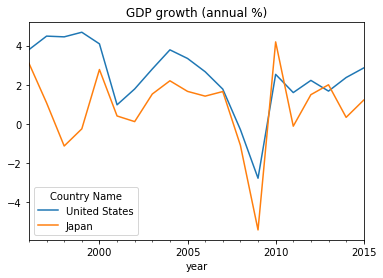

In [10]:
if __name__=="__main__":
    origin_df=worldbank_data_reader("API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2.csv")
    df=worldbank_data_cleaner(origin_df, countries=["United States","Japan"], years=(1996,2016))
    import seaborn as sns
    df.plot(title="GDP growth (annual %)")